画像を時系列データと捉えれば、RNNにより画像を生成することができる。今回は、画像データを使ってRNNモデルを訓練する。そして、画像の上半分から画像の下半分を生成する。

RNNの層にはLSTMを使用する。

## **画像を時系列データとして捉える**
画像はピクセルがならんだ行列として捉えることができる。この行列において、ある行は上下の行の影響受けるので、画像は時系列データの一種と捉えることができる。

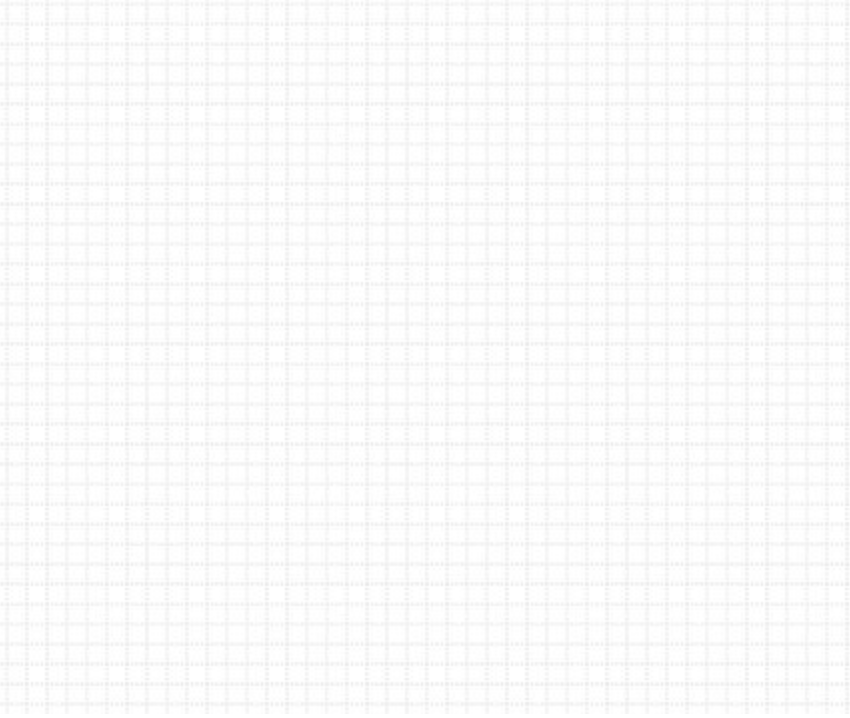

画像の各行は各時刻の入力となり、列幅は入力の数になる。

入力を時系列に並んだ複数の行にして、その次の行を正解とすることでRNNのモデルを訓練することができる。


そして、訓練済みのモデルに最初の数行を入力することで、次の行が予測される。次にこの予測された行を含む最新の数行を入力にして次の行を予測する。

これを繰り返すことにより、画像が１行ずつ生成されていく。

## **Fashion-MNIST**
データセット「Fashion-MNIST」を読み込む。Fashion-MNISTには１０カテゴリー、合計７００００枚のファッションアイテム画像が含まれている。そのうち６００００枚が訓練データで１００００枚がテストデータ。画像はグレースケールで、サイズは２８×２８ピクセル。

今回は、このFashion-MNISTの画像の上半分から、下半分を生成する。

Using downloaded and verified file: ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz
Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw

Using downloaded and verified file: ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz
Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Using downloaded and verified file: ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5522321.48it/s]


ストリーミング出力は最後の 5000 行に切り捨てられました。
Image shape: torch.Size([25, 1, 28, 28])
labels shape: torch.Size([25])
Batch735:
Image shape: torch.Size([25, 1, 28, 28])
labels shape: torch.Size([25])
Batch736:
Image shape: torch.Size([25, 1, 28, 28])
labels shape: torch.Size([25])
Batch737:
Image shape: torch.Size([25, 1, 28, 28])
labels shape: torch.Size([25])
Batch738:
Image shape: torch.Size([25, 1, 28, 28])
labels shape: torch.Size([25])
Batch739:
Image shape: torch.Size([25, 1, 28, 28])
labels shape: torch.Size([25])
Batch740:
Image shape: torch.Size([25, 1, 28, 28])
labels shape: torch.Size([25])
Batch741:
Image shape: torch.Size([25, 1, 28, 28])
labels shape: torch.Size([25])
Batch742:
Image shape: torch.Size([25, 1, 28, 28])
labels shape: torch.Size([25])
Batch743:
Image shape: torch.Size([25, 1, 28, 28])
labels shape: torch.Size([25])
Batch744:
Image shape: torch.Size([25, 1, 28, 28])
labels shape: torch.Size([25])
Batch745:
Image shape: torch.Size([25, 1, 28, 28])
labels shape: torch.Size(

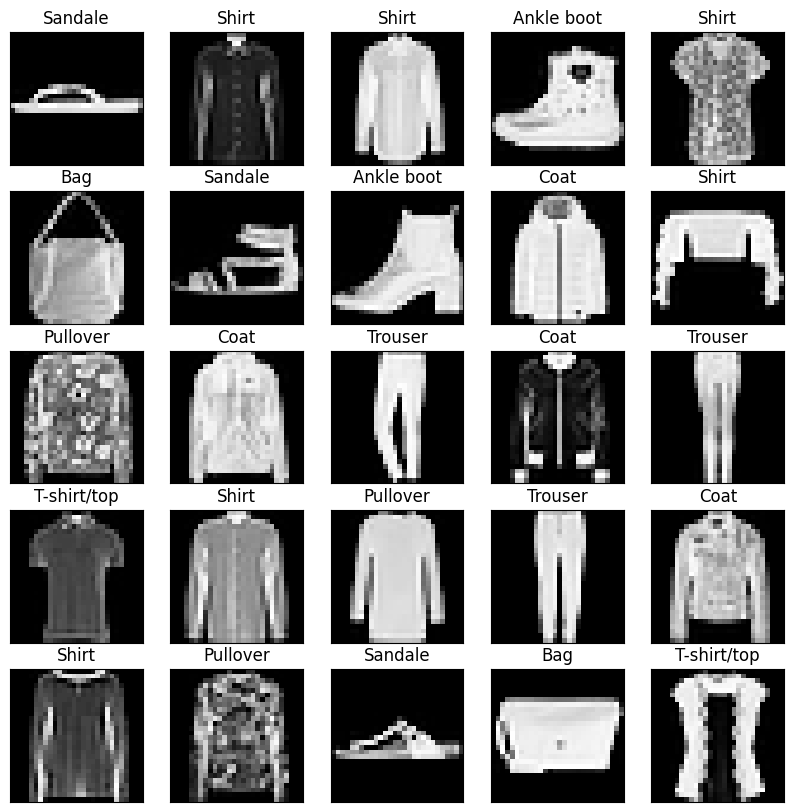

In [ ]:
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

fmnist_data = FashionMNIST(root="./data",
                           train=True, download=True,
                           transform=transforms.ToTensor())
fmnist_classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                  "Sandale", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print("データの数:", len(fmnist_data))

n_image = 25 # 表示する画像の数
fmnist_loader = DataLoader(fmnist_data,
                           batch_size=n_image, shuffle=True)
for batch_idx, (images, labels) in enumerate(fmnist_loader):
    print(f"Batch{batch_idx + 1}:")
    print("Image shape:", images.shape)
    print("labels shape:", labels.shape)

img_size = 28
plt.figure(figsize=(10, 10)) # 画像のサイズ
for i in range(n_image):
    ax = plt.subplot(5, 5, i+1)
    ax.imshow(images[i].view(img_size, img_size),
              cmap="Greys_r")
    label = fmnist_classes[labels[i]]
    ax.set_title(label)
    ax.get_xaxis().set_visible(False) # 軸を非表示に
    ax.get_yaxis().set_visible(False)

plt.show()

## **データの前処理**

画像データをRNNに適した形で整える。

画像データを時系列データに変換するが、正解は時系列の次の行にする。訓練用の画像データは**train_imgs**から何行か取り出して入力**input_data**に置いて、次の行は正解**correct_data**に置く。

今回は28×２８ピクセルの画像を使用するが、時刻の数n_timeを１４とする。これにより、画像の上半分の１４行は最初の入力、すなわちシードとなり、下半分の１４行は１行ずつ予測されることになる。

Batch1:
Image shape: torch.Size([25, 1, 28, 28])
labels shape: torch.Size([10])
Batch2:
Image shape: torch.Size([25, 1, 28, 28])
labels shape: torch.Size([10])
Batch3:
Image shape: torch.Size([25, 1, 28, 28])
labels shape: torch.Size([10])
Batch4:
Image shape: torch.Size([25, 1, 28, 28])
labels shape: torch.Size([10])
Batch5:
Image shape: torch.Size([25, 1, 28, 28])
labels shape: torch.Size([10])
Batch6:
Image shape: torch.Size([25, 1, 28, 28])
labels shape: torch.Size([10])
Batch7:
Image shape: torch.Size([25, 1, 28, 28])
labels shape: torch.Size([10])
Batch8:
Image shape: torch.Size([25, 1, 28, 28])
labels shape: torch.Size([10])
Batch9:
Image shape: torch.Size([25, 1, 28, 28])
labels shape: torch.Size([10])
Batch10:
Image shape: torch.Size([25, 1, 28, 28])
labels shape: torch.Size([10])
Batch11:
Image shape: torch.Size([25, 1, 28, 28])
labels shape: torch.Size([10])
Batch12:
Image shape: torch.Size([25, 1, 28, 28])
labels shape: torch.Size([10])
Batch13:
Image shape: torch.Size([25,

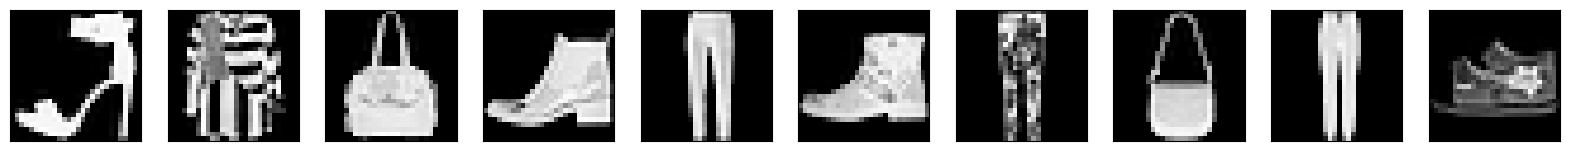

Generated:


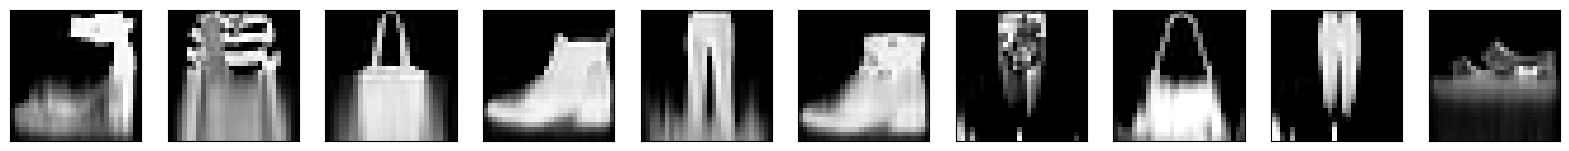

Epoch: 5 Loss_Train: 0.011107104601480127
original:


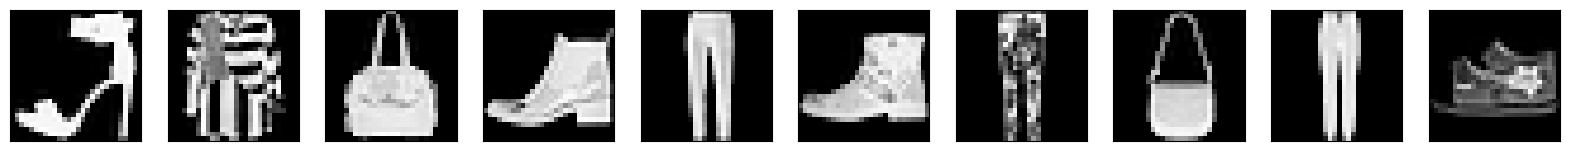

Generated:


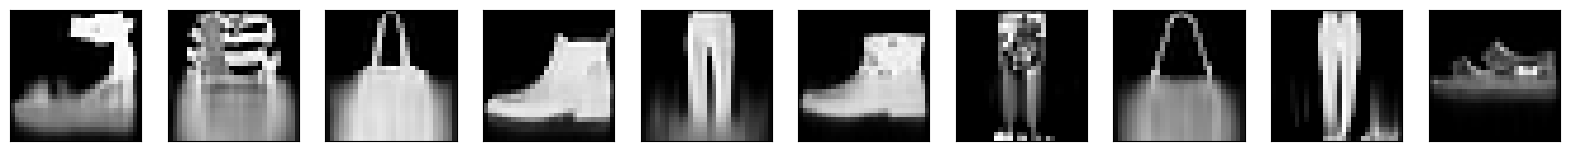

Epoch: 10 Loss_Train: 0.01016195325019684
original:


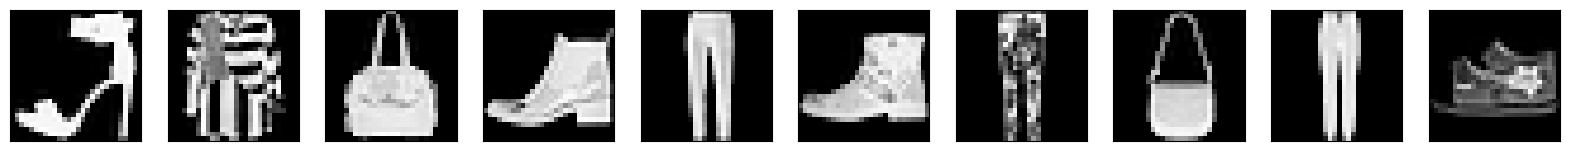

Generated:


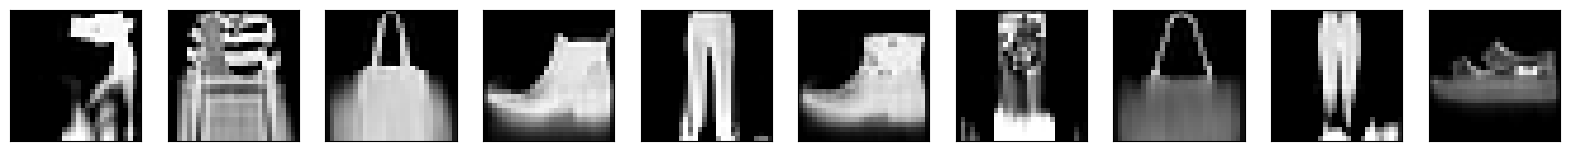

Epoch: 15 Loss_Train: 0.009594219678786698
original:


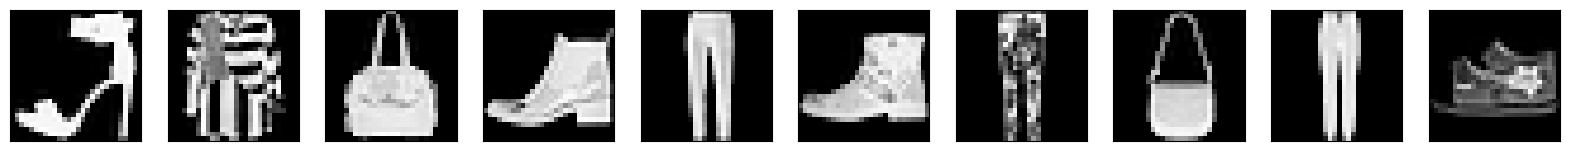

Generated:


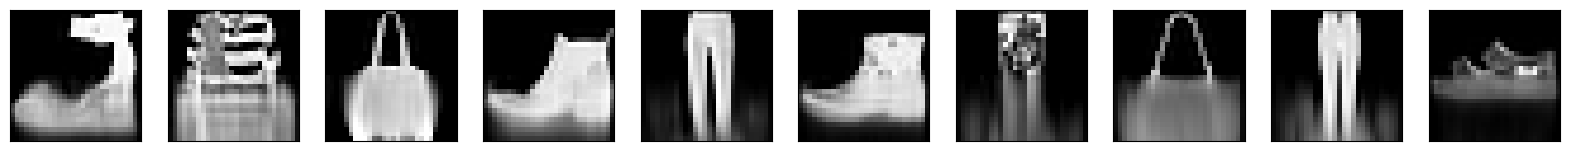

Epoch: 20 Loss_Train: 0.009182926634351836
original:


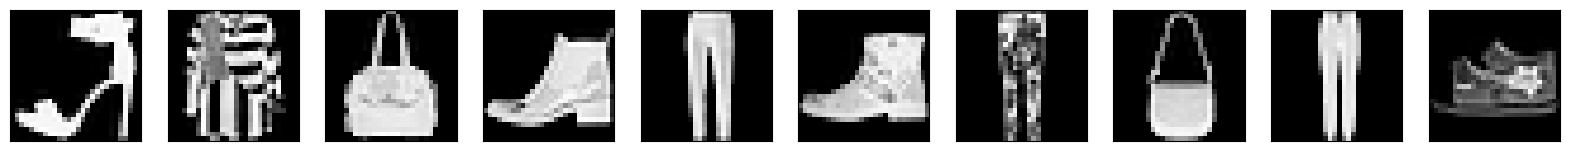

Generated:


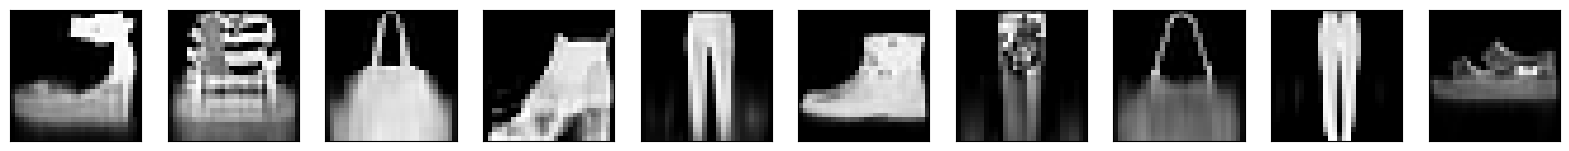

Epoch: 25 Loss_Train: 0.00888297297297471
original:


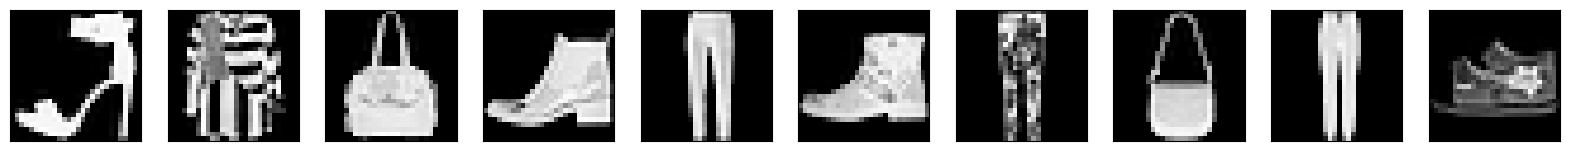

Generated:


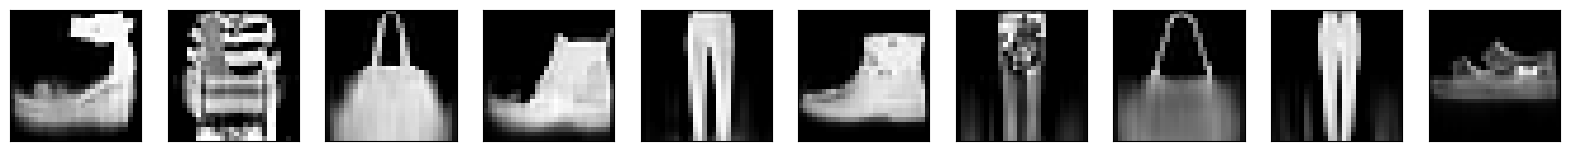

Epoch: 29 Loss_Train: 0.008686346219818225
original:


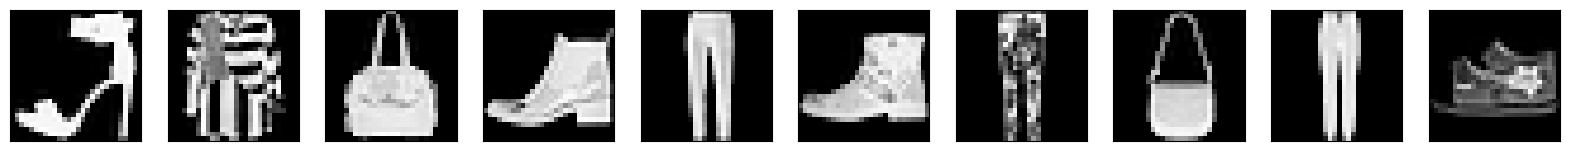

Generated:


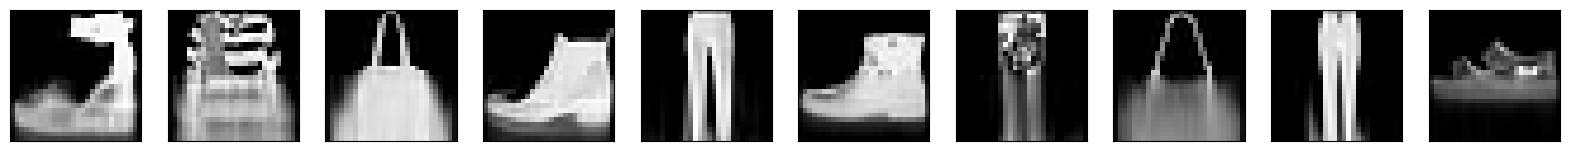

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

n_time = 14  # 時刻の数
n_in = img_size  # 入力層のニューロン数
n_mid = 256  # 中間層のニューロン数
n_out = img_size  # 出力層のニューロン数
n_sample_in_img = img_size - n_time  # 1枚の画像中のサンプル数

dataloader = DataLoader(fmnist_data, batch_size=len(fmnist_data), shuffle=True)
dataiter = iter(dataloader)

for train_imgs, labels in dataiter:
    train_imgs = train_imgs.view(-1, img_size, img_size)

n_sample = len(train_imgs) * n_sample_in_img # サンプル数

input_data = torch.zeros((n_sample, n_time, n_in)) # 入力
correct_data = torch.zeros((n_sample, n_out)) # 正解
for i in range(len(train_imgs)):
    for j in range(n_sample_in_img):
       sample_id = i*n_sample_in_img + j
       input_data[sample_id] = train_imgs[i, j:j+n_time]
       correct_data[sample_id] = train_imgs[i, j+n_time]

dataset = TensorDataset(input_data, correct_data) # データセットの作成
train_loader = DataLoader(dataset, batch_size=128, shuffle=True) # DataLoaderの設定

#テスト用のデータ
n_disp = 10 # 生成し表示する画像の数

disp_data = FashionMNIST(root="./data",
                           train=False, download=True,
                           transform=transforms.ToTensor())
disp_loader = DataLoader(disp_data, batch_size=n_disp, shuffle=False)
for batch_idx, (disp_imgs, labels) in enumerate(disp_loader):
    print(f"Batch{batch_idx + 1}:")
    print("Image shape:", images.shape)
    print("labels shape:", labels.shape)
disp_imgs = disp_imgs.view(-1, img_size, img_size)

#モデルの構築
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn = nn.LSTM( # LSTM層
                     input_size=n_in, # 入力サイズ
                     hidden_size=n_mid, # ニューロン数
                     batch_first=True,
# 入力を(バッチサイズ、時刻の数、入力の数)にする
        )
        self.fc = nn.Linear(n_mid, n_out) # 全結合層

    def forward(self, x):
       # y_rnn:全時刻の出力 h:中間層の最終時刻の値 c:記憶セル
       y_rnn, (h, c) = self.rnn(x, None)
       y = self.fc(y_rnn[:, -1, :]) # yは最後の時刻の出力
       return y

net = Net()
net.cuda()  # GPU対応
print(net)

#画像生成用の関数
def generate_images():
    # オリジナルの画像
    print("original:")
    plt.figure(figsize=(20, 2))
    for i in range(n_disp):
        ax = plt.subplot(1, n_disp, i+1)
        ax.imshow(disp_imgs[i], cmap="Greys_r", vmin=0.0, vmax=1.0)
        ax.get_xaxis().set_visible(False) # 軸を非表示に
        ax.get_yaxis().set_visible(False)
    plt.show()

    # 下半分をRNNにより生成した画像
    print("Generated:")
    net.eval() # 評価モード
    gen_imgs = disp_imgs.clone()
    plt.figure(figsize=(20, 2))
    for i in range(n_disp):
       for j in range(n_sample_in_img):
           x = gen_imgs[i, j:j+n_time].view(1,
           n_time, img_size)
           x = x.cuda() # GPU対応
           gen_imgs[i, j+n_time] = net(x)[0]
       ax = plt.subplot(1, n_disp, i+1)
       ax.imshow(gen_imgs[i].detach(),
       cmap="Greys_r", vmin=0.0, vmax=1.0)
       ax.get_xaxis().set_visible(False) # 軸を非表示に
       ax.get_yaxis().set_visible(False)
    plt.show()

#学習のコード
from torch import optim

# 平均二乗誤差
loss_fnc = nn.MSELoss()

# 最適化アルゴリズム
optimizer = optim.Adam(net.parameters())

# 損失のログ
record_loss_train = []

#学習
epochs = 30 # エポック数
for i in range(epochs):
    net.train() # 訓練モード
    loss_train = 0
    for j, (x, t) in enumerate(train_loader):
    # ミニバッチを取り出す
       x, t = x.cuda(), t.cuda() # GPU対応
       y = net(x)
       loss = loss_fnc(y, t)
       loss_train += loss.item()
       optimizer.zero_grad()
       loss.backward()
       optimizer.step()
    loss_train /= j+1
    record_loss_train.append(loss_train)

    if i%5==0 or i==epochs-1:
       print("Epoch:", i, "Loss_Train:", loss_train)
       generate_images()

## **テスト用のデータ**
今回はテスト用のデータを画像生成の検証にする。



```
n_disp = 10 # 生成し表示する画像の数

disp_data = FashionMNIST(root="./data",
                           train=False, download=True,
                           transform=transforms.ToTensor())
disp_loader = DataLoader(disp_data, batch_size=n_disp, shuffle=False)
for batch_idx, (images, labels) in enumerate(disp_loader):
    print(f"Batch{batch_idx + 1}:")
    print("Image shape:", images.shape)
    print("labels shape:", labels.shape)
disp_imgs = disp_imgs.view(-1, img_size, img_size)
```



## **モデルの構築**

nn.Module()クラスを継承したクラスとして、RNNモデルを構築する。

LSTM層はnn.LSTM()クラスにより実装することができる。



```
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super __init__()
        self.rnn = nn.LSTM( # LSTM層
                     input_size=n_in, # 入力サイズ
                     hidden_size=n_mid, # ニューロン数
                     batch_first=True,
#入力を(バッチサイズ、時刻の数、入力の数)にする
        )
        self.fc = nn.Linear(n_mid, n_out) # 全結合層
   
    def forward(self, x):
       # y_rnn:全時刻の出力 h:中間層の最終時刻の値 c:記憶セル
       y_rnn, (h, c) = self.rnn(x, None)
       y = self.fc(y_rnn[:, -1, :]) # yは最後の時刻の出力
       return y

net = Net()
net.cuda()  # GPU対応
print(net)
```




## **画像生成用の関数**
オリジナルの画像disp_imgと、この画像の上半分をもとに下半分を生成したgen_imgsを並べて表示する。disp_imgは、訓練データに含まれない画像。

最初は画像の上半分をシードにして新たな行を生成するが、次はその新たな行を含む直近の時系列からさらに次の行を生成する。これを繰り返すことで下半分の画像を生成できる。



```
def generate_images():
    # オリジナルの画像
    print("original:")
    plt.figure(figsize=(20, 2))
    for i in range(n_disp):
        ax = plt.subplot(1, n_disp, i+1)
        ax.imshow(disp_imgs[i], cmap="Greys_r", vmin=0.0, vmax=1.0)
        ax.get_xaxis().set_visible(False) # 軸を非表示に
        ax.get_yaxis().set_visible(False)
    plt.show()

    # 下半分をRNNにより生成した画像
    print("Generated:")
    net.eval() # 評価モード
    gen_imgs = disp_imgs.clone()
    plt.figure(figsize=(20, 2))
    for i in range(n_disp):
       for j in range(n_sample_in_img):
           x = gen_imgs[i, j:j+n_time].view(1,
           n_time, img_size)
           x = x.cuda() # GPU対応
           gen_imgs[i, j+n_time] = net(x)[0]
       ax = plt.subplot(1, n_disp, i+1)
       ax.imshow(gen_imgs[i].detach(),
       cmap="Greys_r", vmin=0.0, vmax=1.0)
       ax.get_xaxis().set_visible(False) # 軸を非表示に
       ax.get_yaxis().set_visible(False)
    plt.show()
```



## **学習**
RNNモデルを訓練する。

DataLoaderを使い、ミニバッチを取り出して訓練及び評価を行う。
一定のエポック間隔で、誤差の表示と画像の生成が行われる。



```
from torch import optim

# 平均二乗誤差
loss_fnc = nn.MSELoss()

# 最適化アルゴリズム
optimizer = optim.Adam(net.parameters())

# 損失のログ
record_loss_train = []

#学習
epochs = 30 # エポック数
for i in range(epochs):
    net.train() # 訓練モード
    loss_train = 0
    for j, (x, t) in enumerate(train_loader):
    # ミニバッチを取り出す
       x, t = x.cuda(), t.cuda() # GPU対応
       y = net(x)
       loss = loss_fnc(y, t)
       loss_train += loss.item()
       optimizer.zero_grad()
       loss.backward()
       optimizer.step()
    loss_train /= j+1
    record_loss_train.append(loss_train)

    if i%5==0 or i==epochs-1:
       print("Epoch:", i, "Loss_Train:", loss_train)
       generate_images()
```

学習の初期段階では、生成された画像の下半分はぼやけている。しかしながら学習の進行とともに少しずつ生成された下半分の画像が鮮明になっていく。必ずしもオリジナルの通りになるわけではないが、シードから考えてある程度妥協な画像が生成されている。

## **誤差の推移**
訓練データの誤差の推移をグラフ表示する。

今回はテストデータは使用していない。



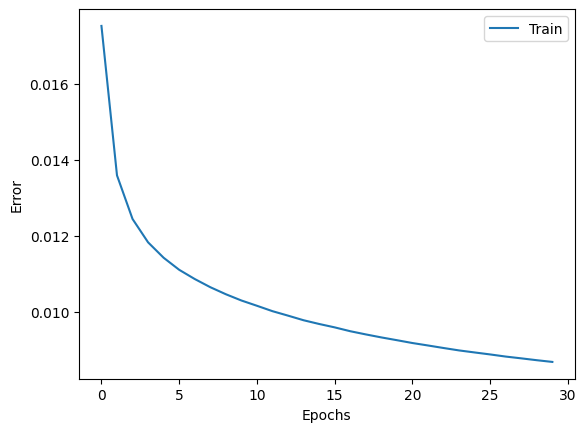

In [ ]:
plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()